In [1]:
from platform import python_version
python_version()

'3.9.20'

In [2]:
!pip install -q -U watermark

In [3]:
!pip install -q missingno

In [4]:
!pip install scipy

In [5]:
!pip install -q category_encoders

In [6]:
!pip install -q plotly
!pip install pandas

In [71]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [72]:
%reload_ext watermark
%watermark -a 'Dylan' --iversions

Author: Dylan

missingno        : 0.5.2
numpy            : 1.26.4
sklearn          : 1.5.1
scipy            : 1.13.1
seaborn          : 0.13.2
pandas           : 2.2.3
sys              : 3.9.20 (main, Oct  3 2024, 07:38:01) [MSC v.1929 64 bit (AMD64)]
matplotlib       : 3.7.1
plotly           : 5.24.1
category_encoders: 2.6.4



In [73]:
df= pd.read_csv('dataset/aug_train.csv')

In [74]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [75]:
df.shape

(19158, 14)

In [76]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [78]:
# Análise Exploratória de Dados

In [79]:
# descrevendo os dados não numéricos
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [80]:
# descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id','target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [81]:
# Visualizando as Variáveis Categóricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [82]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [83]:
!pip install matplotlib

In [84]:
import matplotlib.pyplot as plt


In [85]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

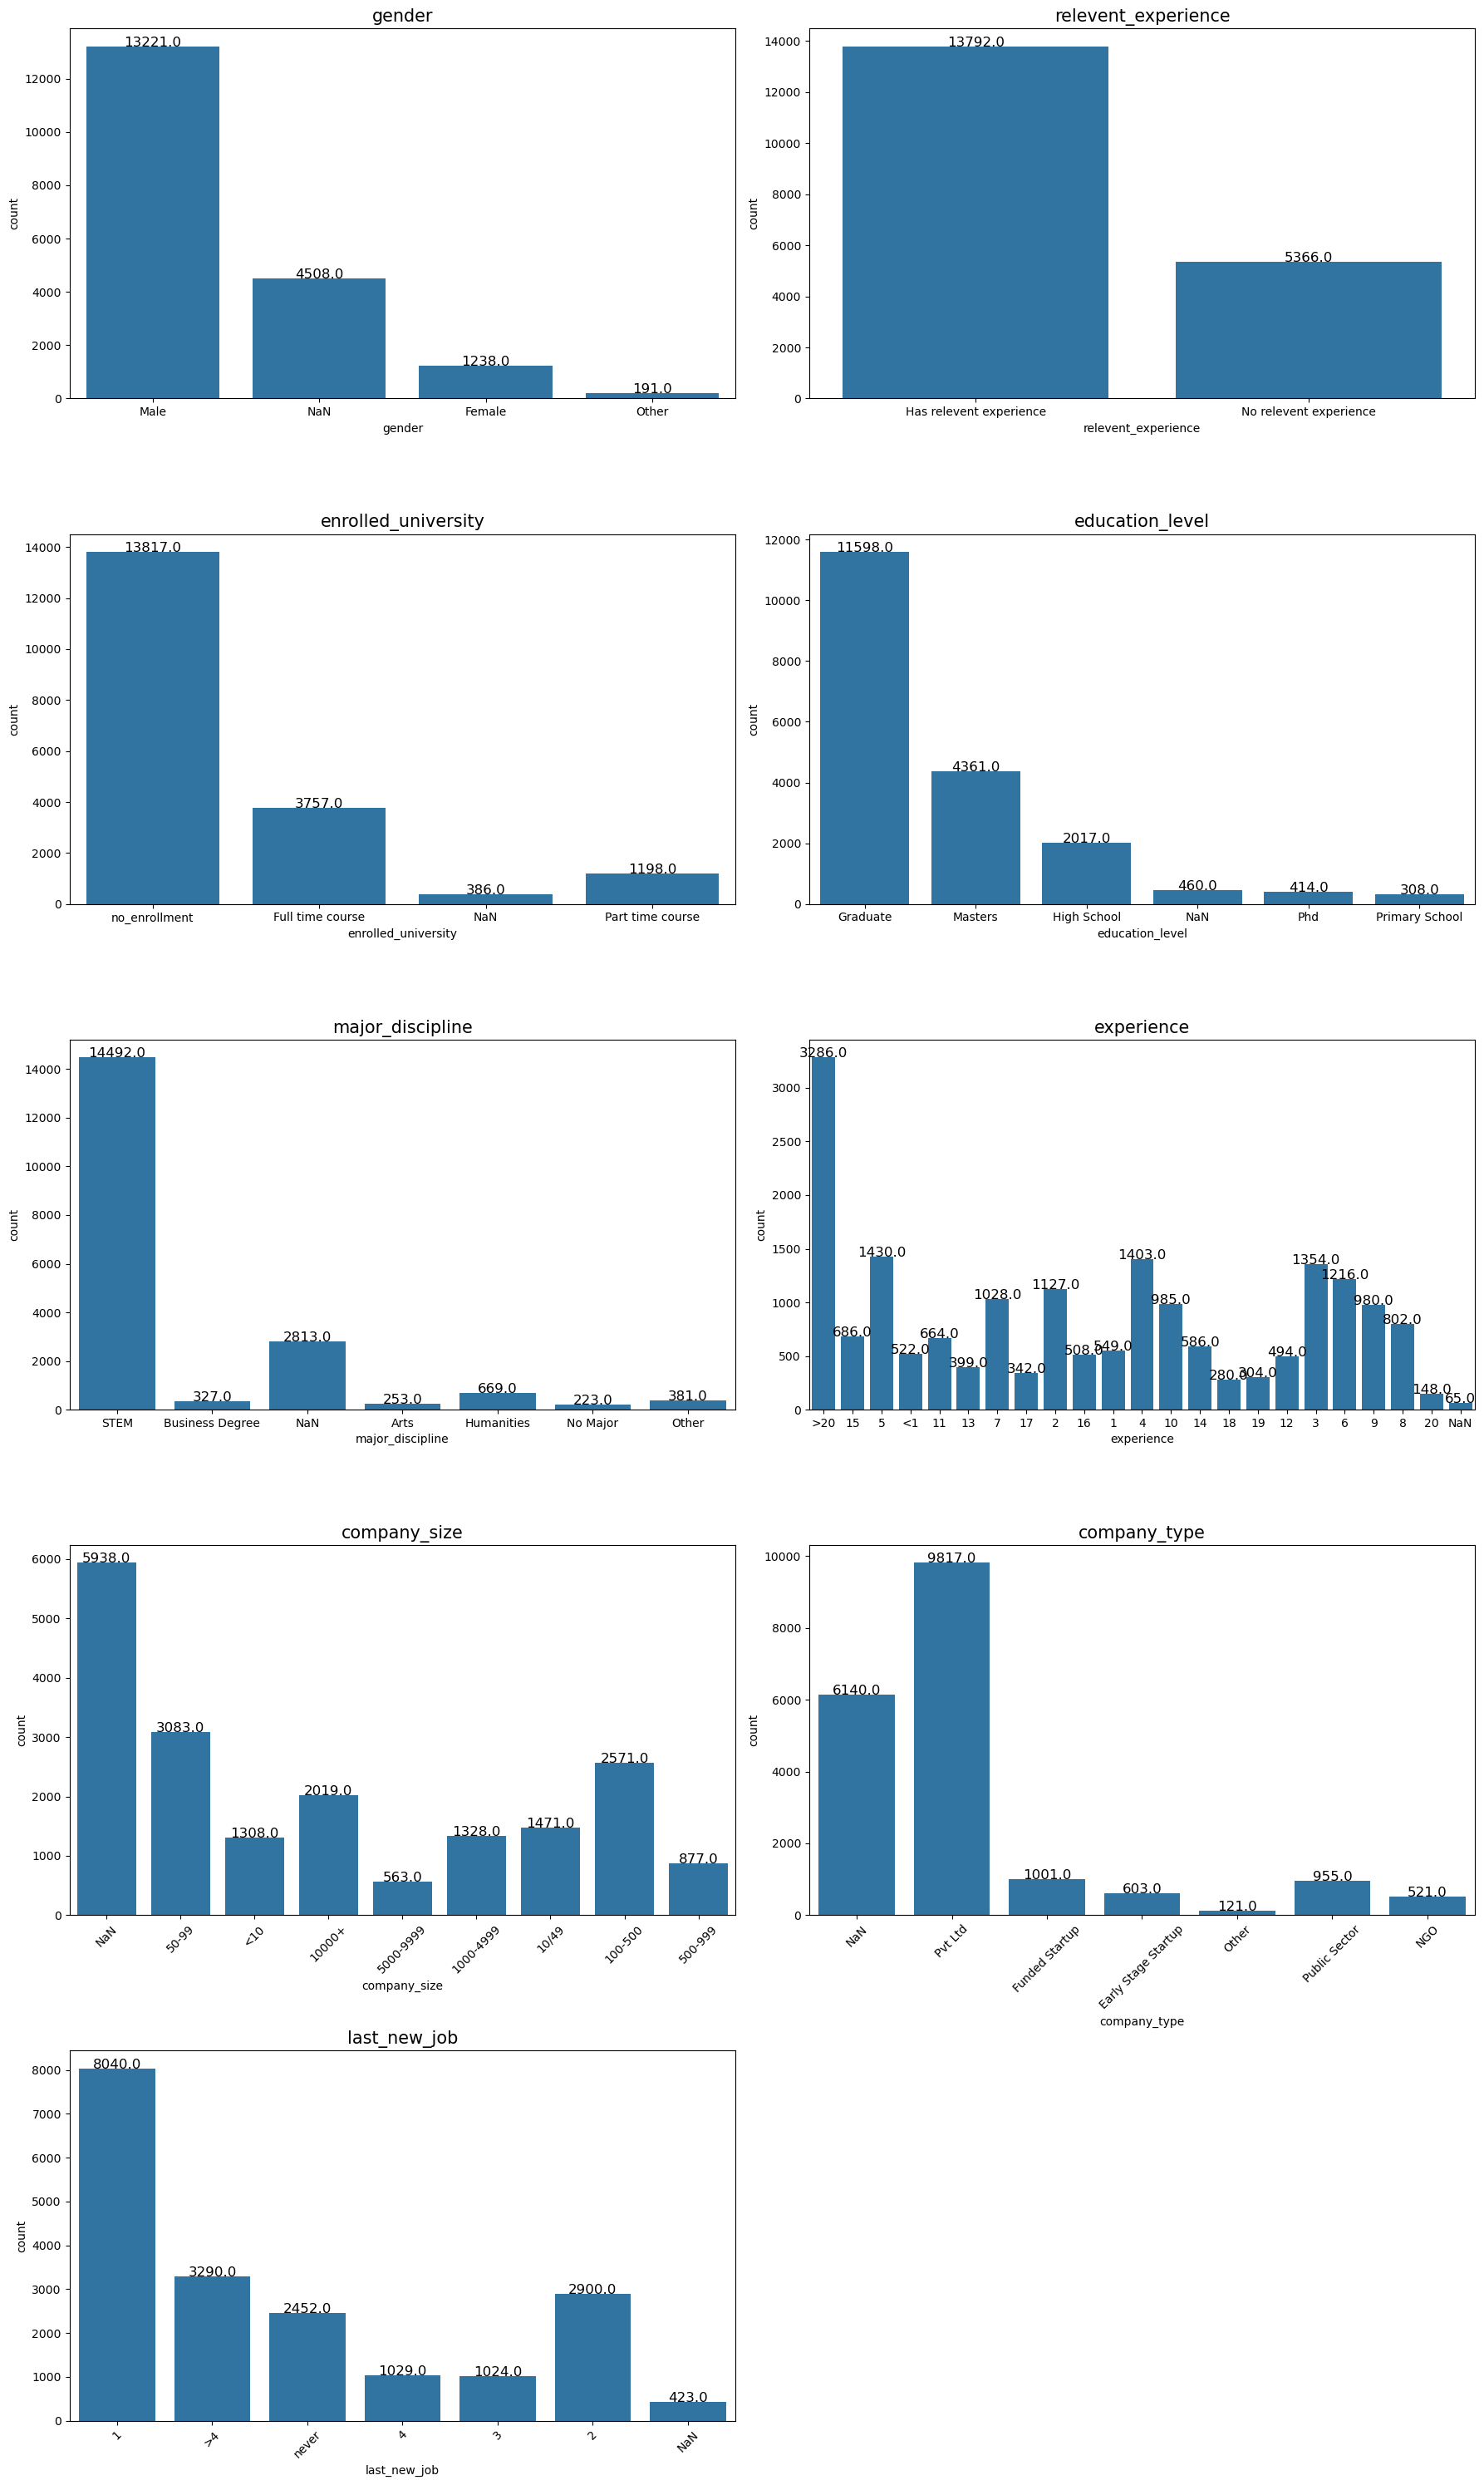

In [86]:
# plot

# Tamnanho da figura

plt.figure(figsize =(18,30))

#Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador

A = 0

for i in column_list:
    A +=1
    plt.subplot(5,2,A)
    ax = sns.countplot(data = df.fillna('NaN'),x=i)
    plt.title(i,fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4,p.get_height()),ha = 'center',color ='black',size=12)
        if A>= 7:
            plt.xticks(rotation = 45)

plt.tight_layout(h_pad=2)

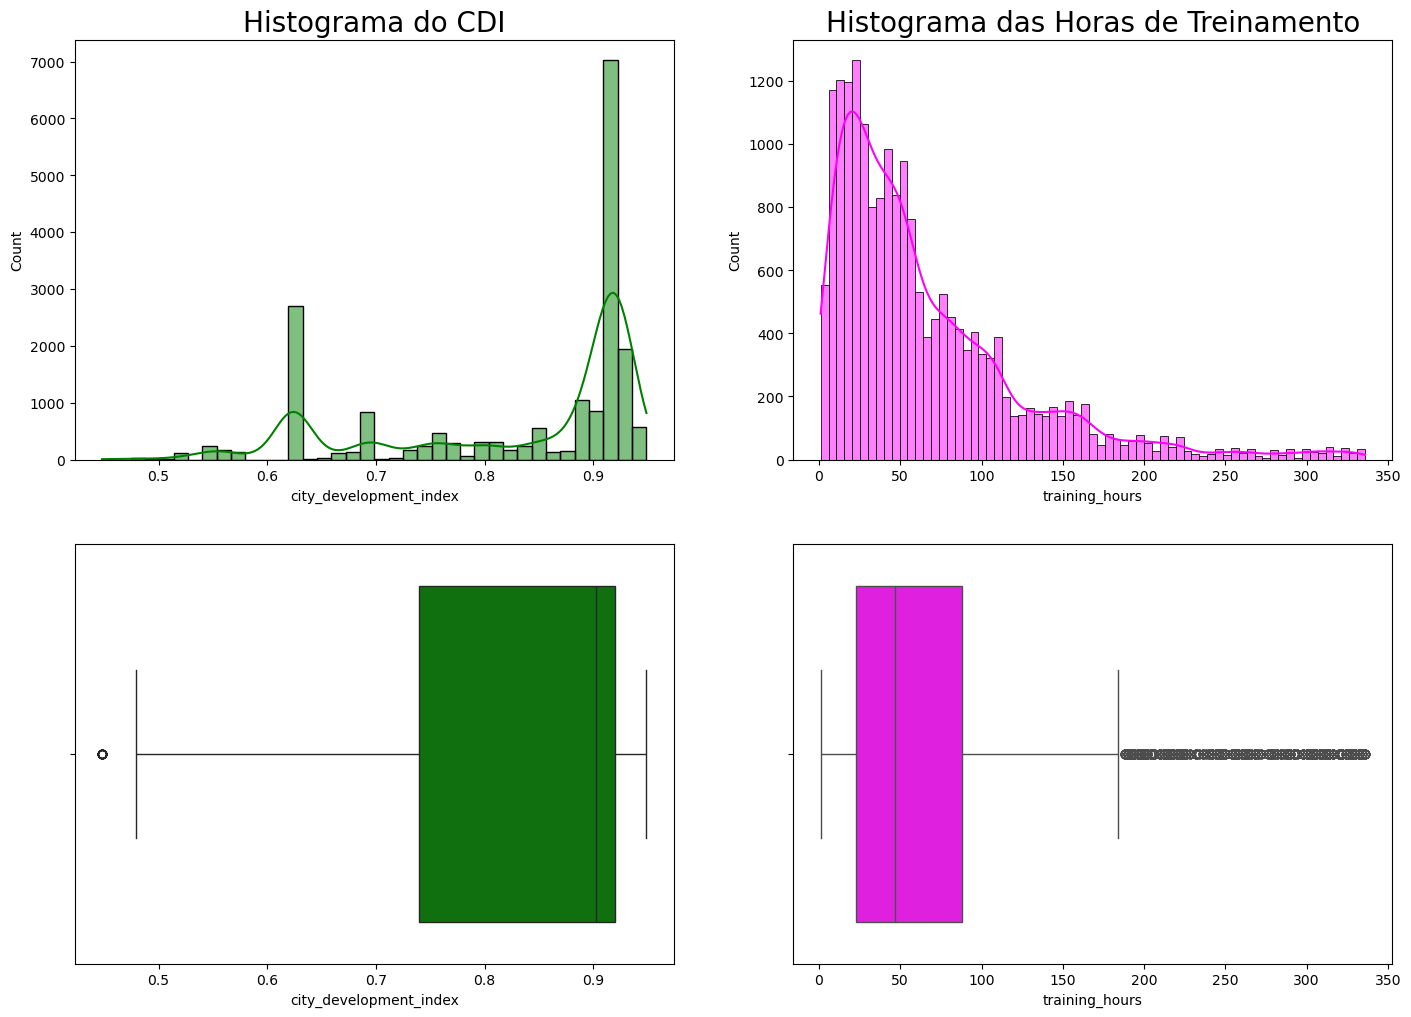

In [87]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.color_palette('hls',8)
sns.histplot(df['city_development_index'],kde=True,color='green')
plt.title('Histograma do CDI', fontsize=20)

plt.subplot(222)
sns.histplot(df['training_hours'],kde = True, color = 'magenta')
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

plt.subplot(223)
sns.boxplot(x= df['city_development_index'],color='green')

plt.subplot(224)
sns.boxplot(x= df['training_hours'],color='magenta')

plt.show()

In [88]:
# Teste de Normalidade de Distribuição

# Lista com as variáveis numéricas

numerical_feature = ['city_development_index','training_hours']

#Loop
for i in numerical_feature:
    stats, pval = normaltest(df[i])
    if pval >0.05:
        print(i,':Distribuição Normal')
    else:
        print(i,': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


In [89]:
df_numerical = df.copy()

In [90]:
df_numerical['experience'].value_counts()

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [91]:
df_numerical['last_new_job'].value_counts()

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [92]:
# Convertemos a variável experience para numérica
df_numerical['experience'] = np.where(df_numerical['experience']=='<1',1,df_numerical['experience'])
df_numerical['experience'] = np.where(df_numerical['experience']=='>20',21,df_numerical['experience'])


In [93]:
df_numerical['experience'] = np.where(df_numerical['experience'] == 20, 21, np.where(df_numerical['experience'] == 21, 20, df_numerical['experience']))
df_numerical['experience'] = df_numerical['experience'].astype(float)

In [94]:
df_numerical['experience'].value_counts()

experience
20.0    3434
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
Name: count, dtype: int64

In [95]:
df_numerical['last_new_job'] = np.where(df_numerical['last_new_job'] =='never',0,df_numerical['last_new_job'])

In [96]:
df_numerical['last_new_job'].value_counts()

last_new_job
1     8040
>4    3290
2     2900
0     2452
4     1029
3     1024
Name: count, dtype: int64

In [97]:
df_numerical['last_new_job'] = np.where(df_numerical['last_new_job'] == 5,4, np.where(df_numerical['last_new_job']==4,5,df_numerical['last_new_job']))

In [98]:
df_numerical['last_new_job'] = np.where(df_numerical['last_new_job']=='>4',5,df_numerical['last_new_job'])

In [99]:
df_numerical['last_new_job']=df_numerical['last_new_job'].astype(float)

In [100]:
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4.0,8,0.0


In [101]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [102]:
df_numerical_rela = df_numerical.drop('enrollee_id',axis = 1)
df_numerical_rela.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1.0,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4.0,8,0.0


In [103]:
# Seleciona apenas colunas numéricas
numeric_cols = df_numerical_rela.select_dtypes(include=['number'])

# Calcula a correlação de Spearman apenas para colunas numéricas
correlation_matrix = numeric_cols.corr(method='spearman')

correlation_matrix

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300695,0.182698,0.007491,-0.279165
experience,0.300695,1.000000,0.472995,0.003385,-0.183413
last_new_job,0.182698,0.472995,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003385,0.002959,1.000000,-0.014126
target,-0.279165,-0.183413,-0.082045,-0.014126,1.000000


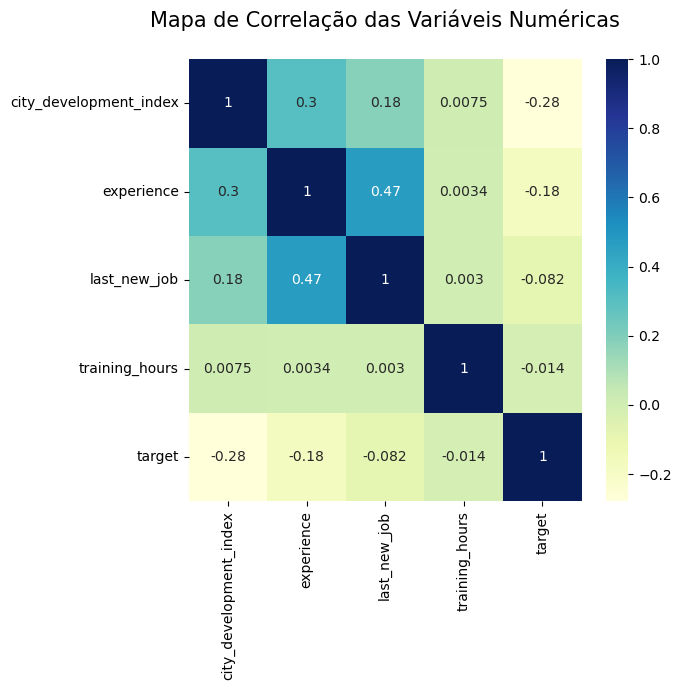

In [104]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation_matrix,annot=True,cmap='YlGnBu')
plt.title('Mapa de Correlação das Variáveis Numéricas\n',fontsize=15)
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

In [105]:
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    df_woe_iv = (pd.crosstab(df[i],df['target'],normalize ='columns')
                 .assign(woe = lambda dfx: np.log(dfx[1]/dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    print(df_woe_iv,'\n-----------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
-----------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
-----------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
-----------------------------------------------------------
target                0.0      

In [106]:
columns_categorics = df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns

<Figure size 1000x1200 with 0 Axes>

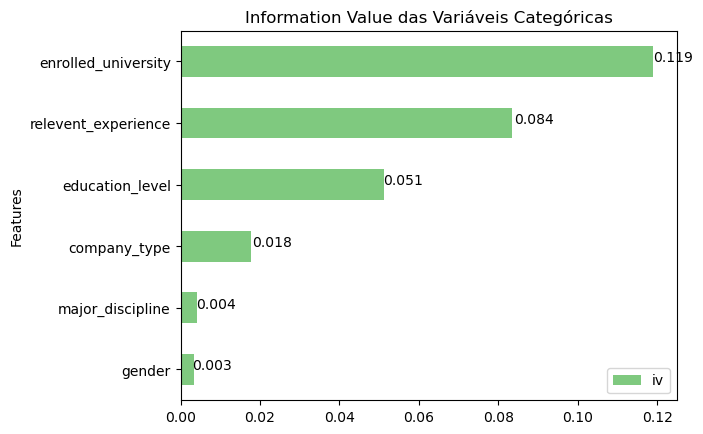

In [107]:
iv=[]

for i in columns_categorics:
     df_woe_iv = (pd.crosstab(df[i],df['target'],normalize ='columns')
                 .assign(woe = lambda dfx: np.log(dfx[1]/dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
     iv.append(df_woe_iv['iv'][0])

df_iv = pd.DataFrame({'Features':columns_categorics,'iv':iv}).set_index('Features').sort_values(by='iv')

plt.figure(figsize=(10,12))

df_iv.plot(kind ='barh',title='Information Value das Variáveis Categóricas',colormap = 'Accent')
for index, value in enumerate(list(round(df_iv['iv'],3))):
    plt.text((value),index,str(value))
plt.legend(loc='lower right')
plt.show()
    

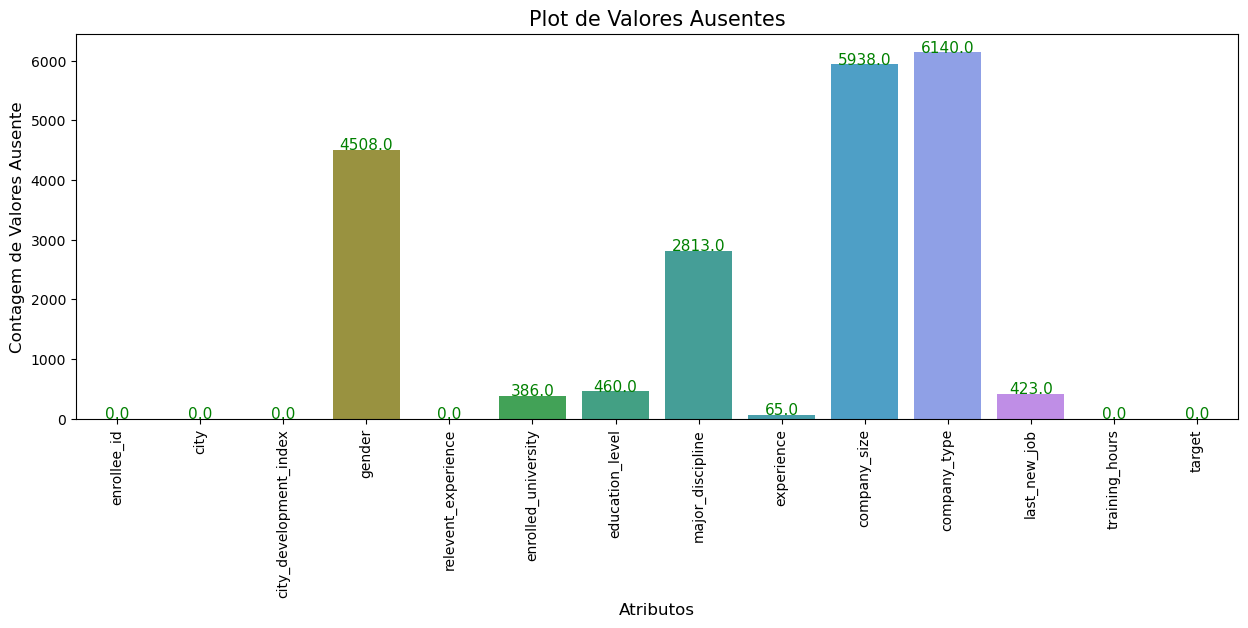

In [108]:
# Identificando os Valores Ausentes
null_df = df.isna().sum().reset_index()

# Figura

ax = plt.figure(figsize = (15,5))

# barplot
ax = sns.barplot(x = null_df['index'],y = null_df[0], palette='husl')
plt.xlabel('Atributos',fontsize=12)
plt.ylabel('Contagem de Valores Ausente',fontsize=12)
plt.xticks(rotation = 90)
plt.title('Plot de Valores Ausentes',fontsize =15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4, (p.get_height())),ha = 'center',color ='green', size = 11)

plt.show()

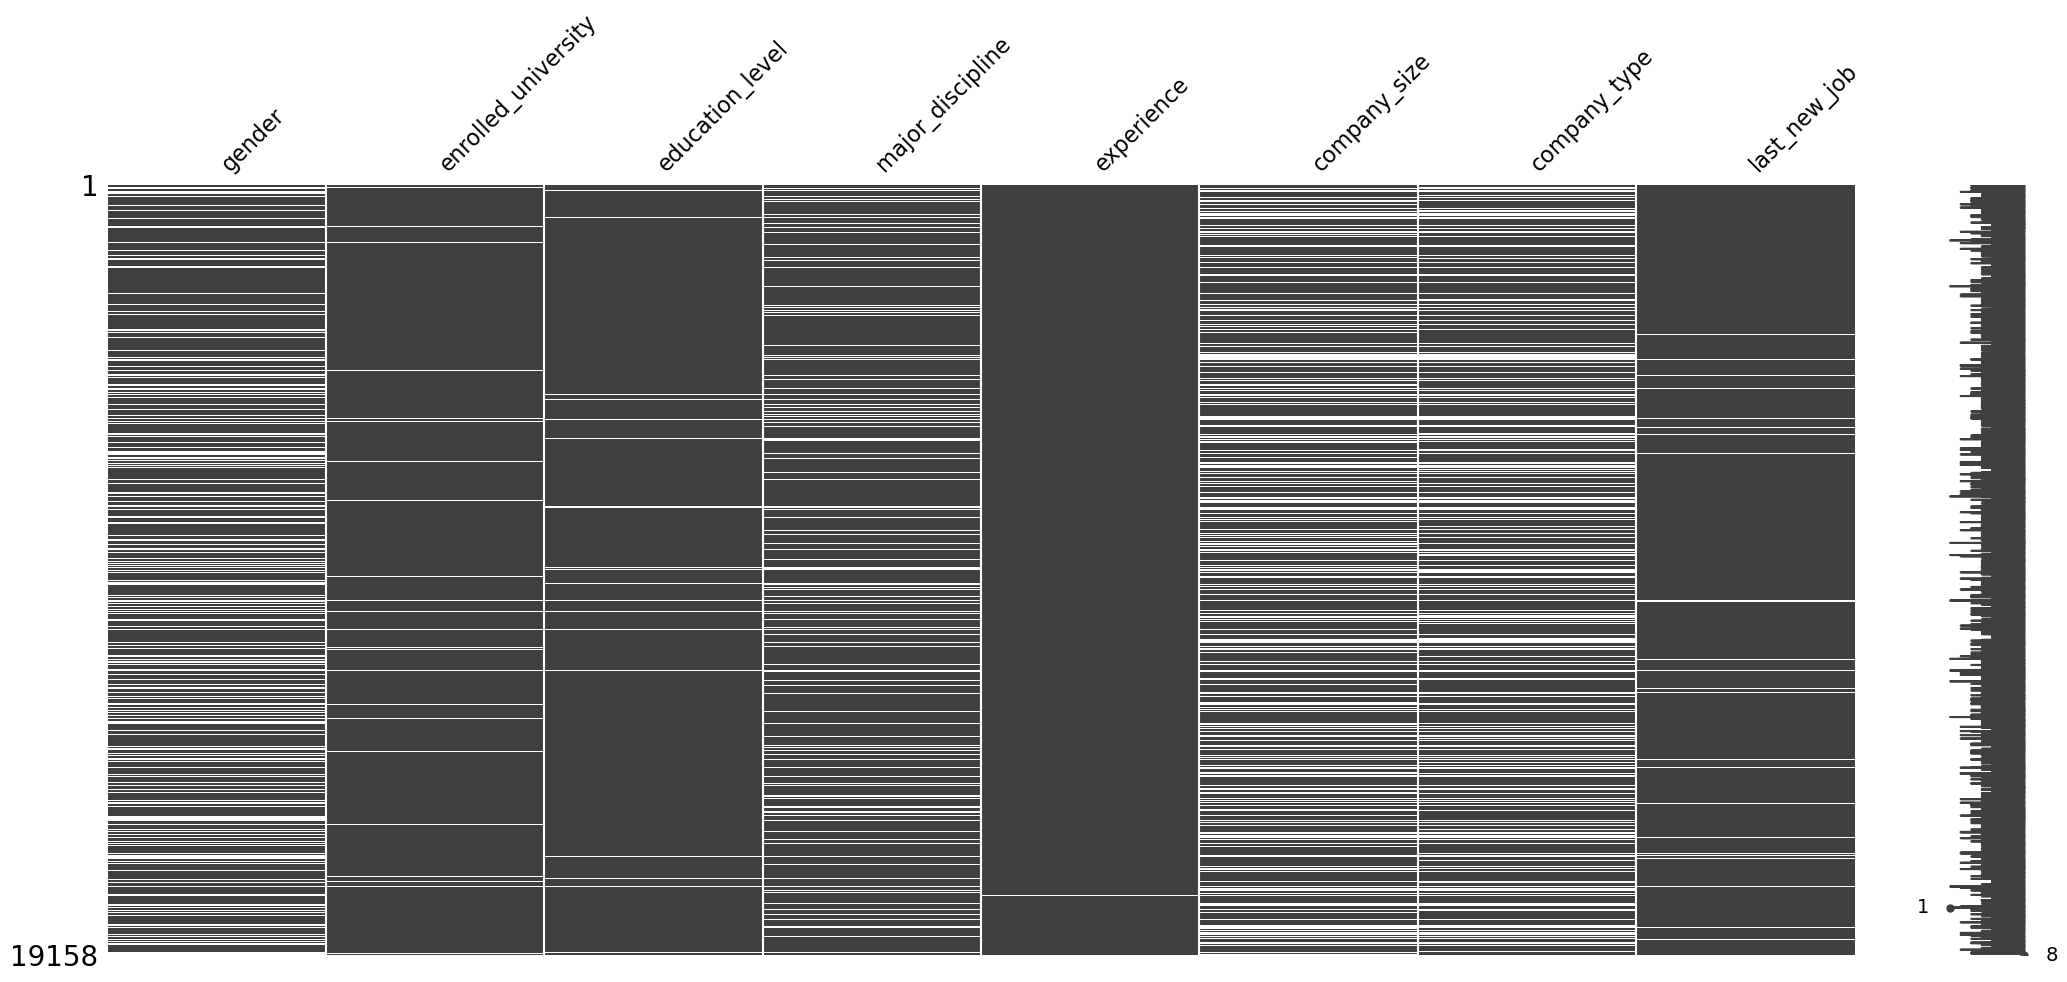

In [109]:
# Gera a visualização

# Dataframe
df_nan = pd.DataFrame(df.isna().sum())

if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

In [110]:
df['enrollee_id'].duplicated().sum()

0

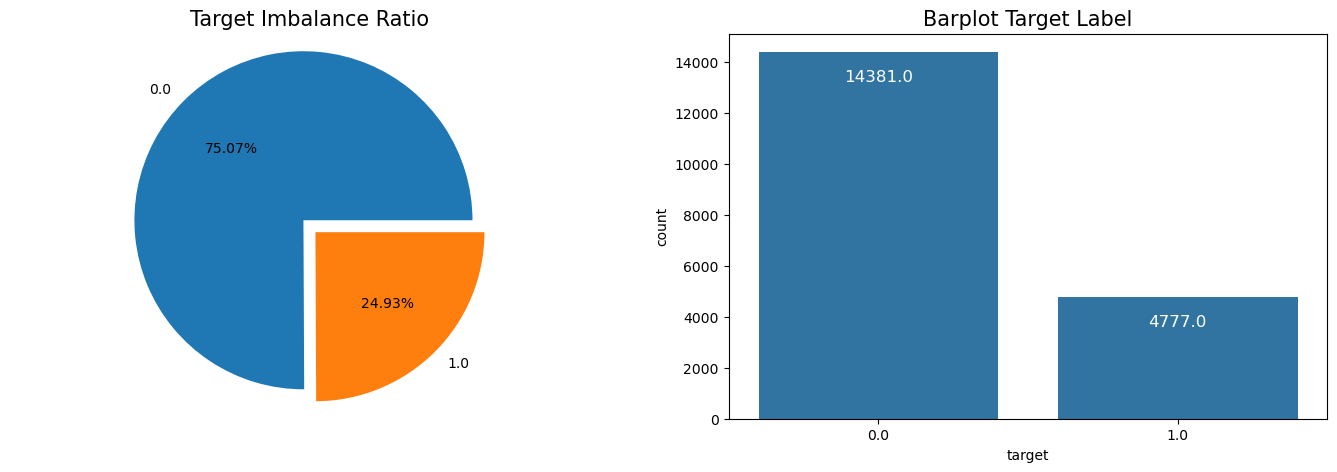

In [111]:
plt.figure(figsize = (17,(100)/20))
plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df)*100,2),
        labels = list(df['target'].value_counts().index),
        autopct = '%.2f%%',
        explode = (0,0.1))

plt.axis('equal')
plt.title('Target Imbalance Ratio',size=15)

plt.subplot(122)
ax = sns.countplot(data = df,x = 'target')
plt.title('Barplot Target Label', fontsize= 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.4,
                 p.get_height()),
                ha = 'center',
                va = 'top',
                color = 'white',
                size = 12)

In [112]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [113]:
colunas_manter = ['city_development_index',
                  'experience',
                  'enrolled_university',
                  'relevent_experience',
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [114]:
new_df = df[colunas_manter]

In [115]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [116]:
null_df = new_df.isna().sum().reset_index()

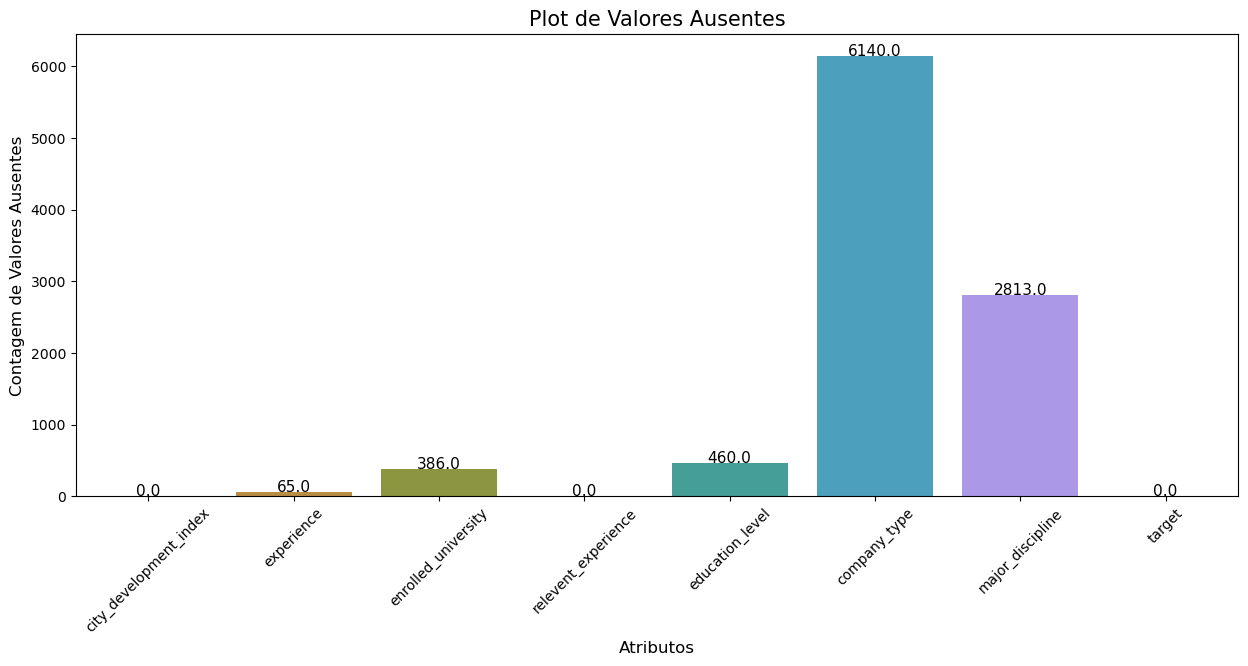

In [117]:
ax = plt.figure(figsize =(15,6))

ax = sns.barplot(x=null_df['index'],y=null_df[0],palette='husl')
plt.xlabel("Atributos",fontsize=12)
plt.ylabel("Contagem de Valores Ausentes",fontsize =12)
plt.xticks(rotation=45)
plt.title("Plot de Valores Ausentes",fontsize=15)

for p in ax.patches:
   ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha='center', color='black', size=11)
plt.show()

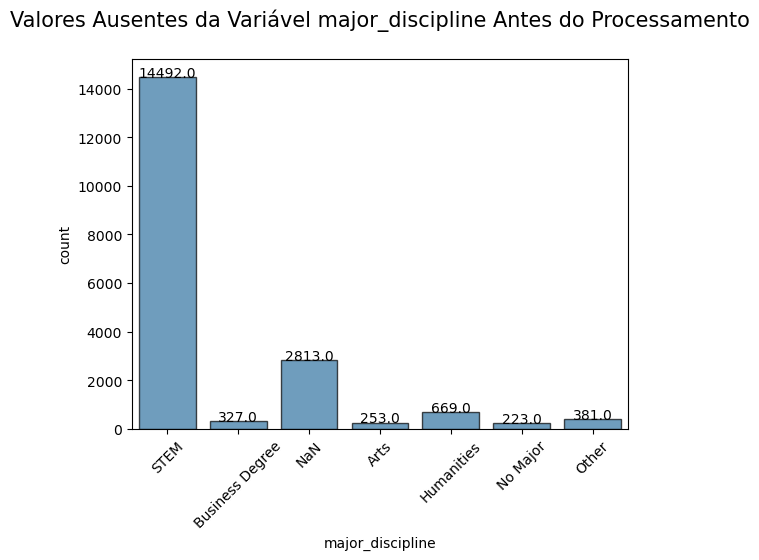

In [118]:
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline',alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4,p.get_height()),ha='center', color = 'black',size =10)
plt.title('Valores Ausentes da Variável major_discipline Antes do Processamento\n',fontsize = 15)
plt.show()

In [119]:
# Relação entre major_discipline x education_level
print('\nTotal de Valores Ausentes na Variável major_discipline:',new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level:


education_level
High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: count, dtype: int64

In [120]:
nan_index = (new_df[(new_df['major_discipline'].isna()) & (new_df['education_level']=='Primary School') | (new_df['education_level'] =='High School')| new_df['education_level'].isna()] ).index

In [121]:
len(nan_index)

2785

In [122]:
new_df['major_discipline'][nan_index] ='Non Degree'

In [123]:
new_df['major_discipline'].isna().sum()

28

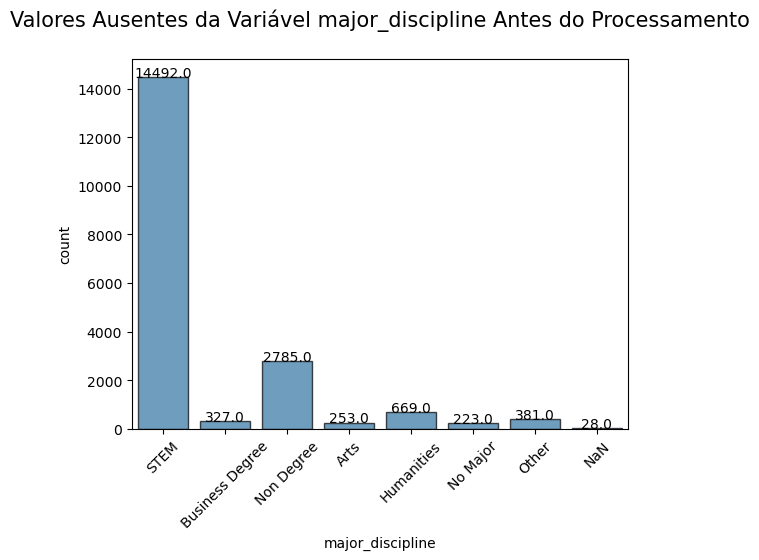

In [124]:
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline',alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4,p.get_height()),ha='center', color = 'black',size =10)
plt.title('Valores Ausentes da Variável major_discipline Antes do Processamento\n',fontsize = 15)
plt.show()

In [125]:
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

education_level
Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: count, dtype: int64

In [126]:
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [127]:
len(nan_index)

9

In [128]:
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [129]:
print('Total de Valores Ausentes:' , new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

Total de Valores Ausentes: 377


education_level
Graduate       171
NaN            100
Masters         53
High School     47
Phd              6
Name: count, dtype: int64

In [130]:
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [134]:
# Para os valores ausentes restantes preenchemos com 'Other'
new_df[new_df['major_discipline'].isna()]  = 'Other'

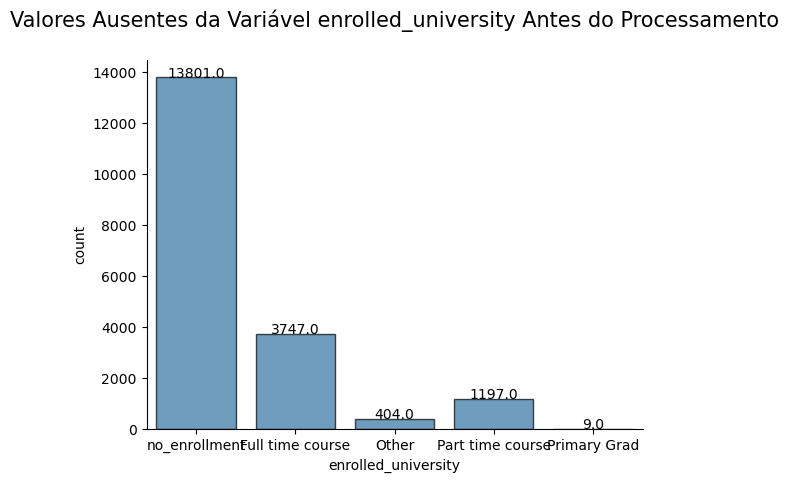

In [136]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize = 15)
plt.show()

In [137]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


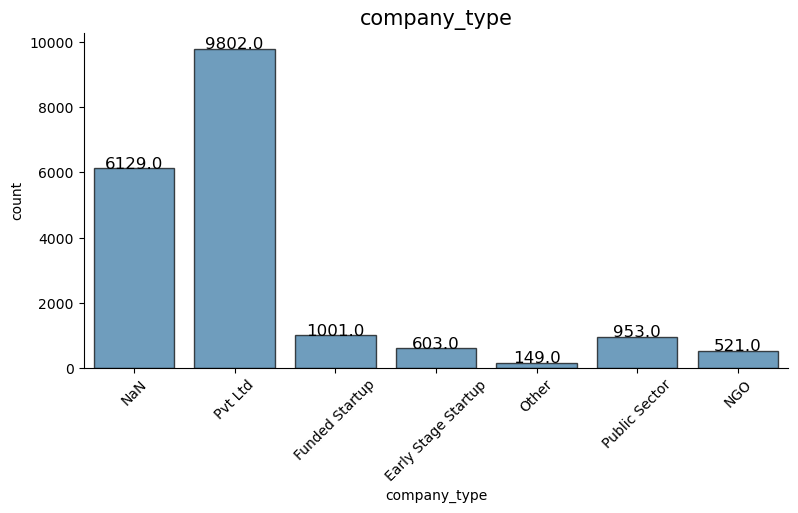

In [139]:
plt.figure(figsize = (20,20))
column_list = ['company_type']
A = 0

for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x= i, alpha =0.7, edgecolor = 'black')
    sns.despine()
    plt.title(i,fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4, p.get_height()),ha= 'center',color='black', size=12)
        if A>=0:
            plt.xticks(rotation =45)

In [140]:
df['company_type'].value_counts(dropna=False)

company_type
Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

In [141]:
# Indice 
nan_index = new_df[(new_df['company_type'].isna())].index

In [142]:
new_df['company_type'][nan_index] = 'Other'

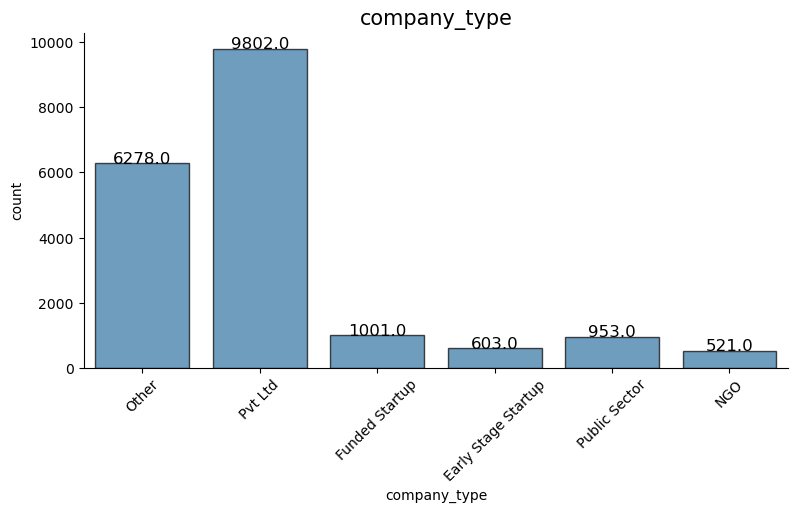

In [144]:
plt.figure(figsize=(20,20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i , alpha =0.7, edgecolor = 'black')
    sns.despine()
    plt.title(i,fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4,p.get_height()),ha='center', color = 'black',size=12)
        if A>=0:
            plt.xticks(rotation=45)
    

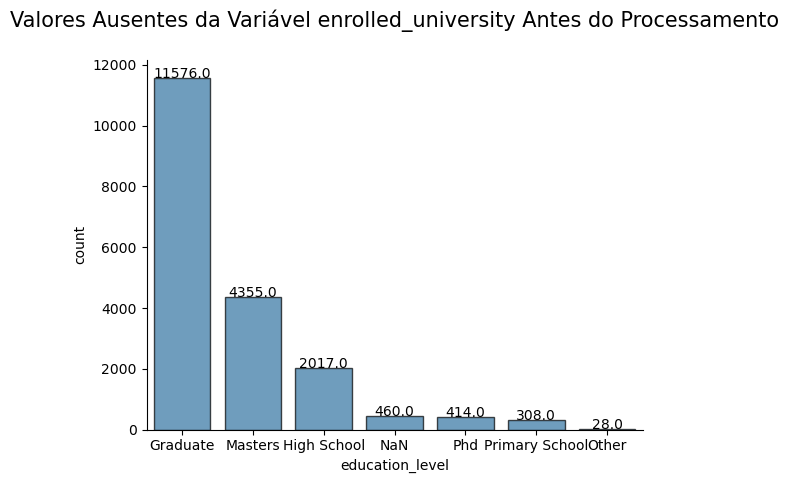

In [146]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize = 15)
plt.show()

In [147]:
nan_index = new_df[(new_df['education_level'].isna())].index
new_df['education_level'][nan_index] ='Other'

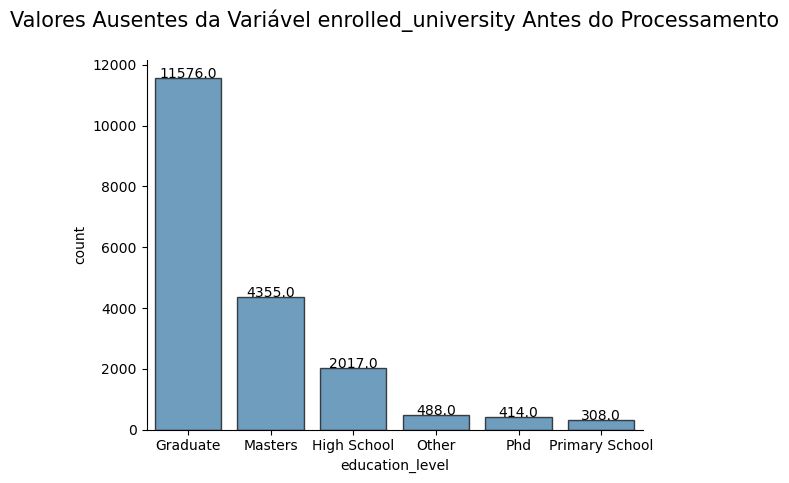

In [148]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize = 15)
plt.show()

In [150]:
# Variável Experience
new_df['experience'].value_counts(dropna=False)

experience
>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: count, dtype: int64

In [158]:
percent_missing = new_df.isnull().sum()/len(new_df)* 100
percent_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

In [159]:
new_df['experience'].isnull().sum()

63

In [160]:
new_df.shape

(19158, 8)

In [161]:
new_df = new_df.dropna()

In [162]:
new_df.shape

(19095, 8)

In [163]:
percent_missing = new_df.isnull().sum() *100/len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

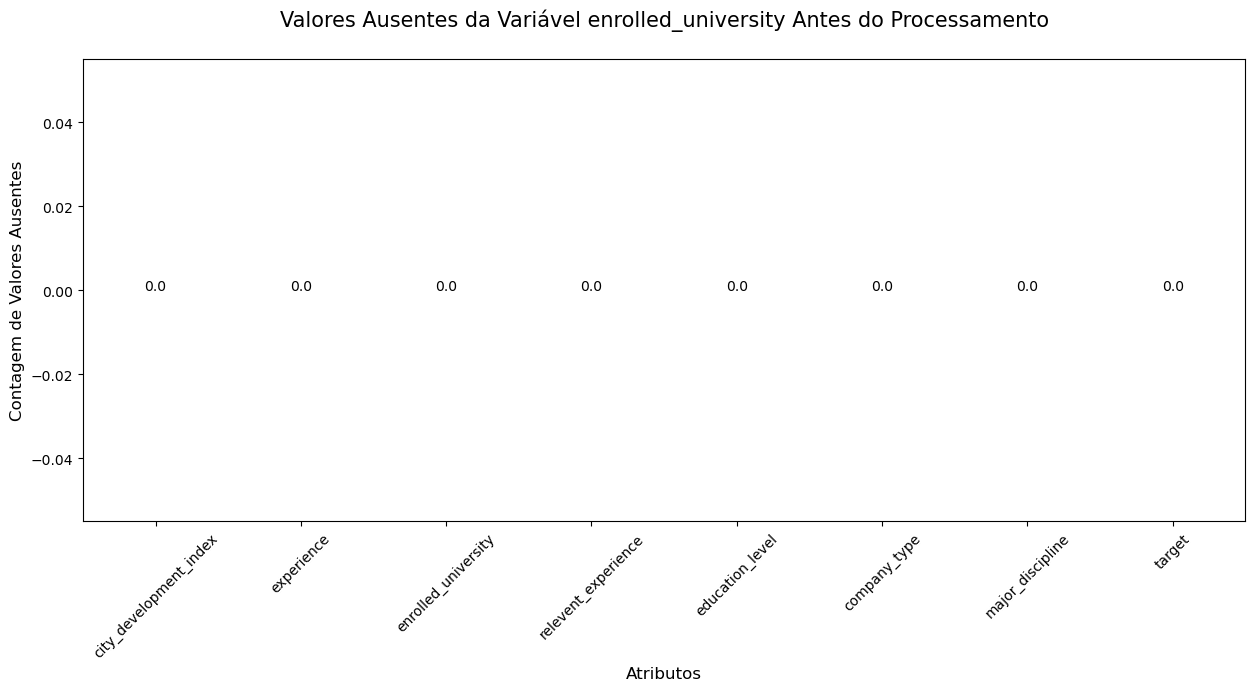

In [167]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot

ax = sns.barplot(x= null_df['index'],y = null_df[0],palette ='husl')
# Plot
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize =12)
plt.xticks(rotation = 45)
plt.title('Plot de Valores Ausentes',fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize = 15)
plt.show()

In [168]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [169]:
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment','No enrollment')

In [170]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [171]:
x = new_df.drop(columns = ['target'])
y = new_df['target']